<a href="https://colab.research.google.com/github/PolyanskayaP/FMMRAZ_6sem/blob/main/KDZ5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

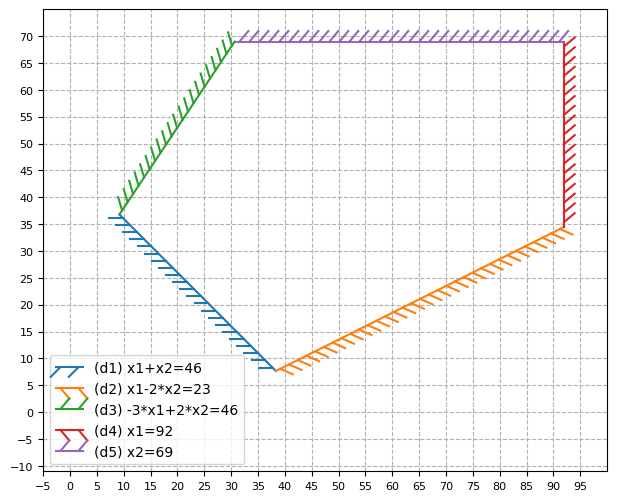

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

d1_x1 = np.linspace(9.2, 38.33333, 100)  #для генерации последовательности чисел 0..60 в линейном пространстве с одинаковым размером шага 100
d1_x2 = 46 - d1_x1

d2_x1 = np.linspace(38.33333, 92, 100)
d2_x2 = 0.5*d2_x1 - 11.5 

d3_x1 = np.linspace(9.2, 30.667, 100)
d3_x2 = 23 + 1.5*d3_x1 

d4_x1 = [92 for i in range(100) ]
d4_x2 = np.linspace(34.5, 69, 100)

d5_x1 = np.linspace(30.667, 92, 100)
d5_x2 = [69 for i in range(100) ]

fig = plt.figure(figsize=((9,6)))
ax = fig.add_subplot(111)

ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 
plt.xlim(-5,100)  #координатная сетка от скольки до скольки 
plt.ylim(-11,75)
plt.grid(linestyle='--')
plt.xticks([i for i in range(-5,100,5)], size=8)
plt.yticks([i for i in range(-10,75,5)], size=8)

ax.plot(d1_x1, d1_x2, label="(d1) x1+x2=46",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=-135)])

ax.plot(d2_x1, d2_x2, label="(d2) x1-2*x2=23",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=-50)])

ax.plot(d3_x1, d3_x2, label="(d3) -3*x1+2*x2=46",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=50)])

ax.plot(d4_x1, d4_x2, label="(d4) x1=92",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=-50)])

ax.plot(d5_x1, d5_x2, label="(d5) x2=69",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=50)])


ax.legend()
plt.show() 